In [30]:
import pandas as pd


In [31]:
df=pd.read_csv("Mumbai1.csv")
df.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [32]:
df.isna().sum()

Unnamed: 0              0
Price                   0
Area                    0
Location                0
No. of Bedrooms         0
New/Resale              0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

In [33]:
df['No. of Bedrooms'].unique()

array([1, 4, 3, 2, 5, 6, 7], dtype=int64)

In [34]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [35]:
df[~df['Area'].apply(is_float)].head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool


In [36]:
df1=df.copy()
df1['price_per_sqft']=df1['Price']/df1['Area']
df1.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,price_per_sqft
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,6736.111111
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1,7500.000000
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,10307.692308
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,6923.076923
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,7518.796992


In [37]:
len(df1.Location.unique())

413

In [38]:
df1.Location=df1.Location.apply(lambda x: x.strip())

In [39]:
no_of_loc=df1.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
no_of_loc

Location
Kharghar                533
Thane West              418
Mira Road East          390
Ulwe                    319
Kalyan West             176
                       ... 
Poonam Sagar Complex      1
Pokhran Road No 2         1
Pokharan Road             1
Poddar Road               1
15th Road                 1
Name: Location, Length: 413, dtype: int64

In [40]:
loc_less_than_5=no_of_loc[no_of_loc<=5]
len(loc_less_than_5)

284

In [41]:
df1.Location=df1.Location.apply(lambda x: 'other'if x in loc_less_than_5 else x )

In [42]:
df1.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,price_per_sqft
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,6736.111111
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1,7500.000000
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,10307.692308
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,6923.076923
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,7518.796992


In [43]:
df2=df1[~(df1.Area/df['No. of Bedrooms']<300)]
df2.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,price_per_sqft
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,6736.111111
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1,7500.000000
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,10307.692308
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,6923.076923
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,7518.796992


In [44]:
df1.shape


(6347, 20)

In [45]:
df2.shape

(6187, 20)

In [46]:
df2.price_per_sqft.describe()

count      6187.000000
mean      13457.088189
std        9583.492750
min        1597.444089
25%        7142.857143
50%       10307.692308
75%       17022.659452
max      109950.522265
Name: price_per_sqft, dtype: float64

In [47]:
df2.groupby('Location')['price_per_sqft'].describe().head()

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Airoli,26.0,11170.453721,1678.346838,7142.857143,10073.529412,11679.487179,12116.967871,15500.000000
Ambernath East,15.0,4403.554295,951.038214,3333.333333,3727.046374,4023.138833,5170.666037,6240.000000
Ambernath West,15.0,3891.979903,288.373491,3312.302839,3850.261726,4000.000000,4000.000000,4454.545455
Andheri,13.0,19767.221816,8652.533737,3482.142857,14711.538462,20275.862069,24666.666667,33870.967742
Andheri East,79.0,19479.854387,5450.707655,11333.333333,16021.825397,17777.777778,21538.461538,32222.222222


In [48]:
import numpy as np

In [49]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key , sub_df in df.groupby('Location'):
        m=np.mean(sub_df.price_per_sqft)
        sd=np.std(sub_df.price_per_sqft)
        red_df=sub_df[(sub_df.price_per_sqft >= (m-sd)) & (sub_df.price_per_sqft <= (m+sd))]
        df_out=pd.concat([df_out,red_df],ignore_index=True)
    return df_out
df3=remove_outliers(df2)
df3.shape



(4749, 20)

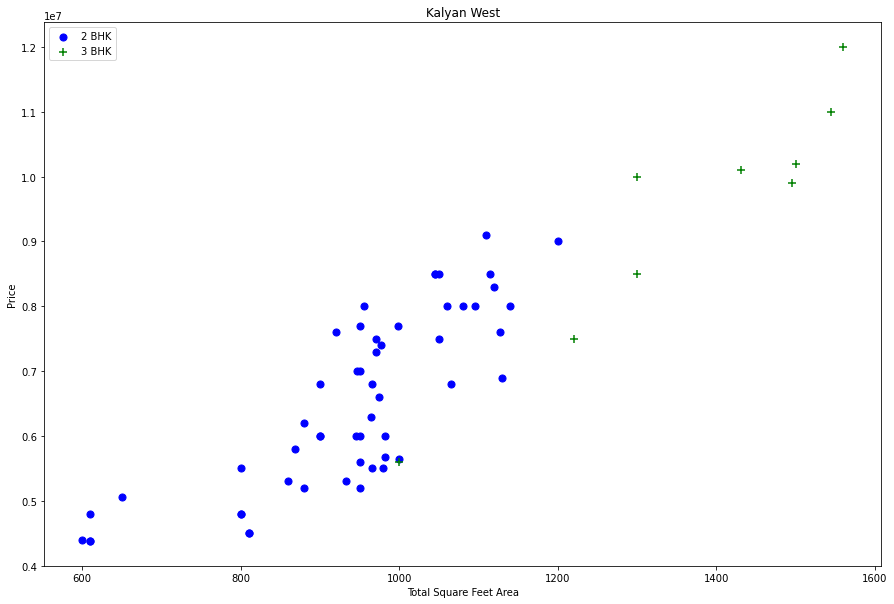

In [50]:
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)
def plot_scatter_chart(df,Location):   
    bhk2 = df[(df.Location==Location) & (df['No. of Bedrooms']==2)]
    bhk3 = df[(df.Location==Location) & (df['No. of Bedrooms']==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Area,bhk2.Price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.Area,bhk3.Price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(Location)
    plt.legend()
    
plot_scatter_chart(df3,"Kalyan West")

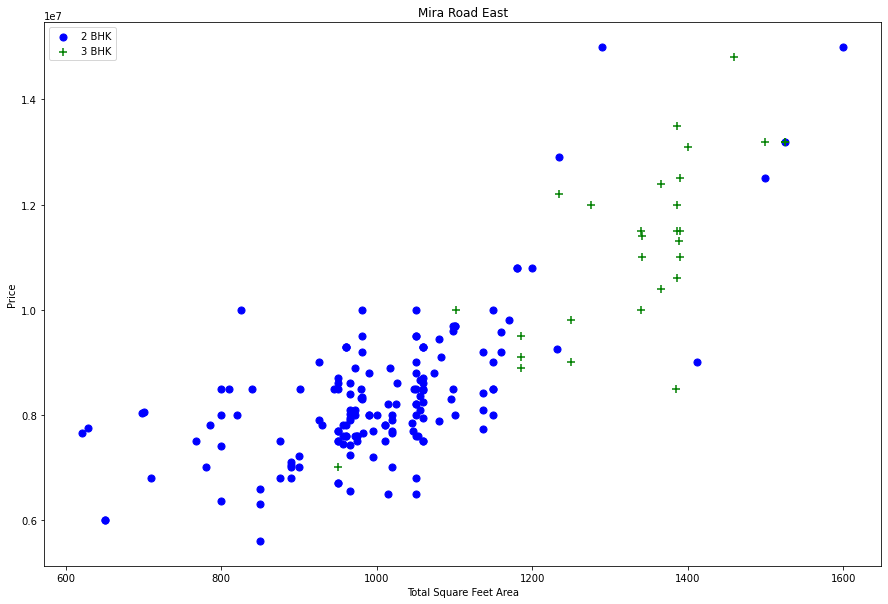

In [51]:
plot_scatter_chart(df3,"Mira Road East")

In [52]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('No. of Bedrooms'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('No. of Bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_bhk_outliers(df3)
df4.shape


(3610, 20)

Text(0, 0.5, 'Count')

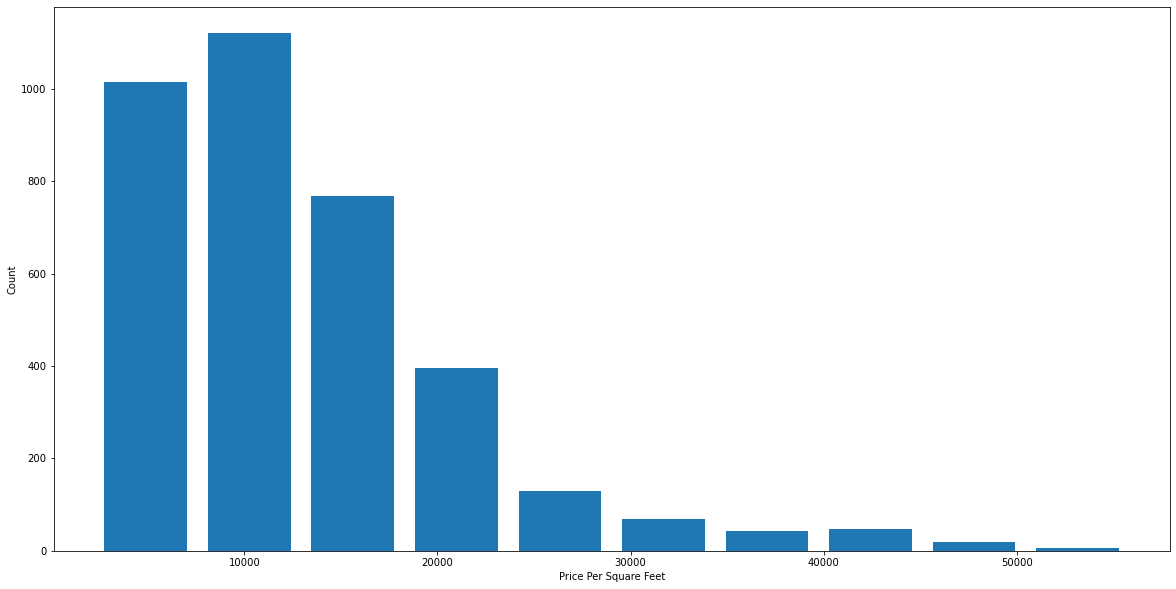

In [53]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [60]:
dummies= pd.get_dummies(df4.Location)
dummies.head()

,Airoli,Ambernath East,Ambernath West,Andheri,Andheri East,Andheri West,Badlapur,Badlapur East,Badlapur West,Bandra East,...,Wadala,Wadala East Wadala,Worli,kandivali,kavesar,matunga east,mumbai,other,taloja panchanand,vile parle west
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df5=pd.concat([df4,dummies.drop(['other'],axis='columns')],axis='columns')
df5.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,...,Virar West,Wadala,Wadala East Wadala,Worli,kandivali,kavesar,matunga east,mumbai,taloja panchanand,vile parle west
0,1145,14900000,1245,Airoli,2,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1146,14000000,1183,Airoli,2,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1884,14800000,1245,Airoli,2,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4148,7500000,600,Airoli,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4153,7500000,600,Airoli,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df6=df5.drop(['Location'],axis='columns')
df6.head()

,Unnamed: 0,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,...,Virar West,Wadala,Wadala East Wadala,Worli,kandivali,kavesar,matunga east,mumbai,taloja panchanand,vile parle west
0,1145,14900000,1245,2,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1146,14000000,1183,2,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1884,14800000,1245,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4148,7500000,600,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,4153,7500000,600,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X=df6.drop('Price',axis='columns')
X.head()

,Unnamed: 0,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,...,Virar West,Wadala,Wadala East Wadala,Worli,kandivali,kavesar,matunga east,mumbai,taloja panchanand,vile parle west
0,1145,1245,2,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1146,1183,2,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1884,1245,2,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4148,600,1,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,4153,600,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,df6.Price,test_size=0.2)

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,df6.Price)

,model,best_score,best_params
0,linear_regression,0.898053,{'normalize': False}
1,lasso,0.898056,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.930644,"{'criterion': 'mse', 'splitter': 'best'}"


In [65]:
dt_reg=DecisionTreeRegressor()
dt_reg.fit(X_train,y_train)
dt_reg.score(X_test,y_test)

0.9471678460351675